<a href="https://colab.research.google.com/github/D-Soto/Coco/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
debt_df = pd.read_csv('/content/drive/My Drive/DS/cust_seg.csv', index_col = 'Customer Id')
dept_df.drop(columns = 'Unnamed: 0', inplace = True)
debt_df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
dept_df.isnull().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [ ]:
debt_df.shape

(850, 8)

In [ ]:
debt_df['Defaulted'].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [ ]:
debt_df.dropna(inplace = True)

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(debt_df)

In [ ]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
debt_df['cluster'] = kmeans.labels_

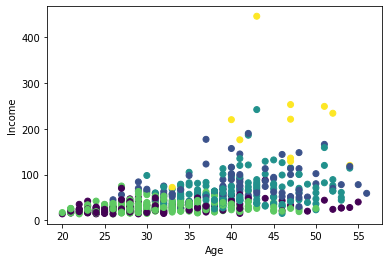

In [ ]:
plt.scatter(debt_df['Age'], debt_df['Income'], c = debt_df['cluster'])
plt.xlabel('Age')
plt.ylabel('Income');

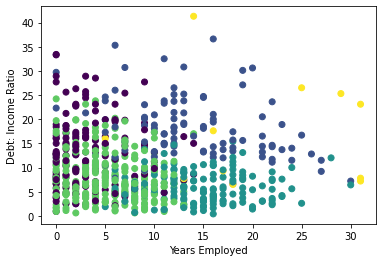

In [ ]:
plt.scatter(debt_df['Years Employed'], debt_df['DebtIncomeRatio'], c = debt_df['cluster'])
plt.xlabel('Years Employed')
plt.ylabel('Debt: Income Ratio');

In [ ]:
debt_df['cluster'].value_counts()

3    287
2    155
0    147
1    100
4     11
Name: cluster, dtype: int64

In [ ]:
seg1 = debt_df[debt_df['cluster'] == 0]
seg2 = debt_df[debt_df['cluster'] == 1]
seg3 = debt_df[debt_df['cluster'] == 2]
seg4 = debt_df[debt_df['cluster'] == 3]
seg5 = debt_df[debt_df['cluster'] == 4]

In [ ]:
cust_segs = [seg1, seg2, seg3, seg4, seg5]
for segment in cust_segs:
  print(segment.describe().T)

                 count       mean        std  ...     50%      75%     max
Age              147.0  31.176871   7.757189  ...  29.000  36.0000  55.000
Edu              147.0   1.802721   0.896259  ...   2.000   2.0000   4.000
Years Employed   147.0   3.394558   3.315712  ...   2.000   5.0000  14.000
Income           147.0  28.727891  12.316354  ...  26.000  35.0000  88.000
Card Debt        147.0   1.327891   1.156505  ...   1.019   1.8465   5.897
Other Debt       147.0   2.361959   1.674774  ...   1.823   3.1880   7.823
Defaulted        147.0   1.000000   0.000000  ...   1.000   1.0000   1.000
DebtIncomeRatio  147.0  13.197959   6.997636  ...  12.800  17.0000  33.400
cluster          147.0   0.000000   0.000000  ...   0.000   0.0000   0.000

[9 rows x 8 columns]
                 count      mean        std  ...      50%       75%      max
Age              100.0  40.13000   6.904332  ...  40.0000  45.25000   56.000
Edu              100.0   1.98000   1.034555  ...   2.0000   3.00000    5.0

In [ ]:
age_means = [np.mean(segment['Age']) for segment in cust_segs]
income_means = [np.mean(segment['Income']) for segment in cust_segs]
debtincomeratio_means = [np.mean(segment['DebtIncomeRatio']) for segment in cust_segs]

In [ ]:
Final_df = pd.DataFrame({'Cust Segment': ['seg1', 'seg2', 'seg3', 'seg4', 'seg5'], 'Age Means': age_means, 
                           'Income Means': income_means, 'DebtIncomeRatio Means': debtincomeratio_means})

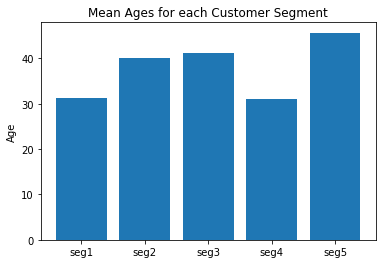

In [ ]:
plt.bar(Final_df['Cust Segment'], Final_df['Age Means'])
plt.ylabel('Age')
plt.title('Mean Ages for each Customer Segment');

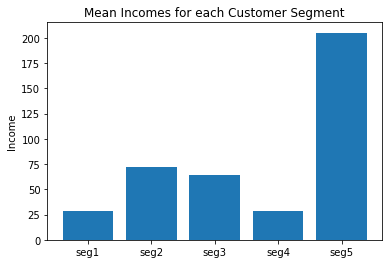

In [ ]:
plt.bar(Final_df['Cust Segment'], Final_df['Income Means'])
plt.ylabel('Income')
plt.title('Mean Incomes for each Customer Segment');